# **سوال ۲**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as fft
import time

f = open("Signal.txt", "r")
signal = []
for x in f:
  signal.append(float(x))



# **بخش اول**
الف)

1.

In [2]:
sample_rate = len(signal) / 2
print(sample_rate)

1000.0


# **بخش دوم**

الف)

1.

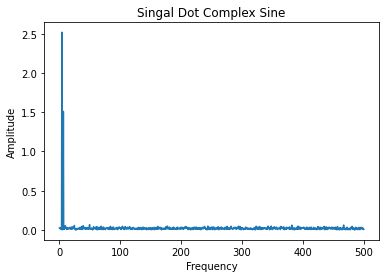

In [21]:
t = np.linspace(0, 2, 2 * int(sample_rate))
normal_t = (t - t.min()) / (t.max() - t.min())
sample_rate = int(sample_rate)

nyqu = sample_rate // 2

freqs = np.linspace(0, nyqu, sample_rate)
normal_freqs = np.arange(2 * sample_rate)

def complex_sine(freq):
  return np.exp(-1j * 2 * np.pi * freq * normal_t)

def sum_dot(f, _freqs, coef):
  ft = []
  for freq in _freqs:
    ft.append(coef * (np.dot(f, complex_sine(freq))))
  return ft

loop_time_start = time.time()

ft = sum_dot(signal, normal_freqs, 1)

loop_time_stop = time.time()
loop_time = loop_time_stop - loop_time_start

corr_ft = (np.abs(ft) / sample_rate)[range(sample_rate)]

plt.plot(freqs, corr_ft)
plt.title("Singal Dot Complex Sine")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

ب)

1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  This is separate from the ipykernel package so we can avoid doing imports until


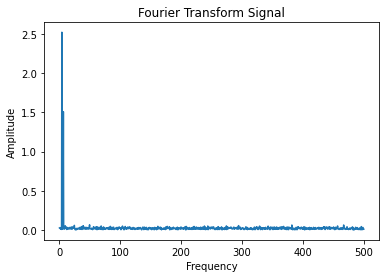

In [12]:
fft_time_start = time.time()

signal_ft = fft.fft(signal)
signal_ft_corr = (np.abs(signal_ft) / (sample_rate))[range(sample_rate)]

fft_time_stop = time.time()
fft_time = fft_time_stop - fft_time_start

plt.plot(freqs, signal_ft_corr)
plt.title("Fourier Transform Signal")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

2.

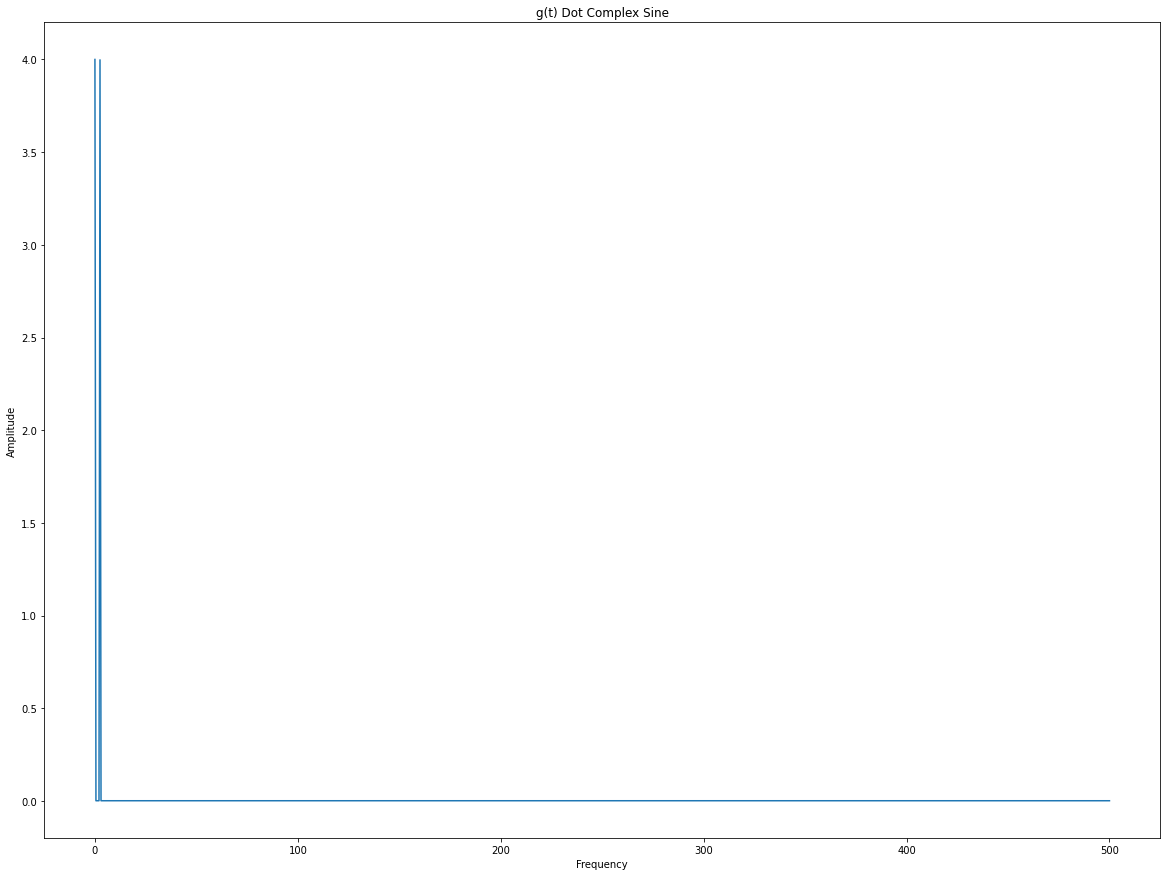

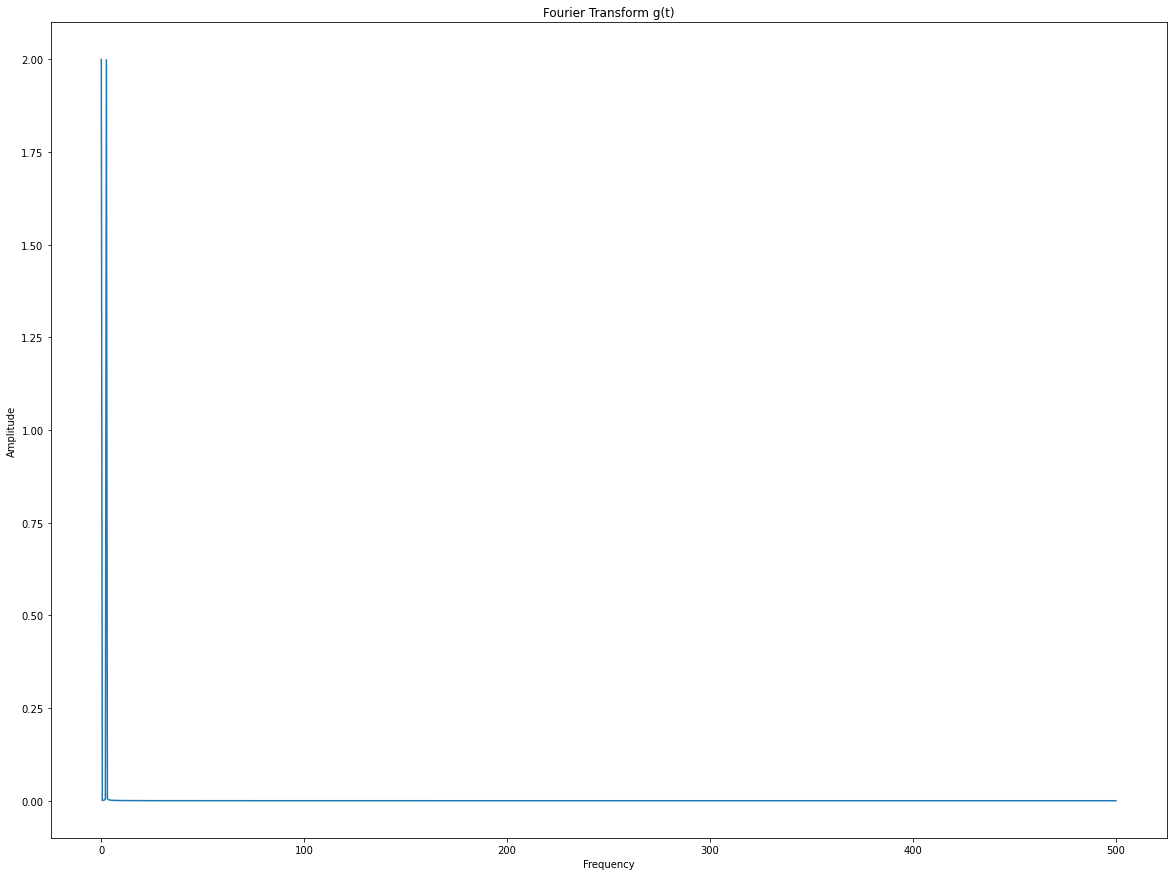

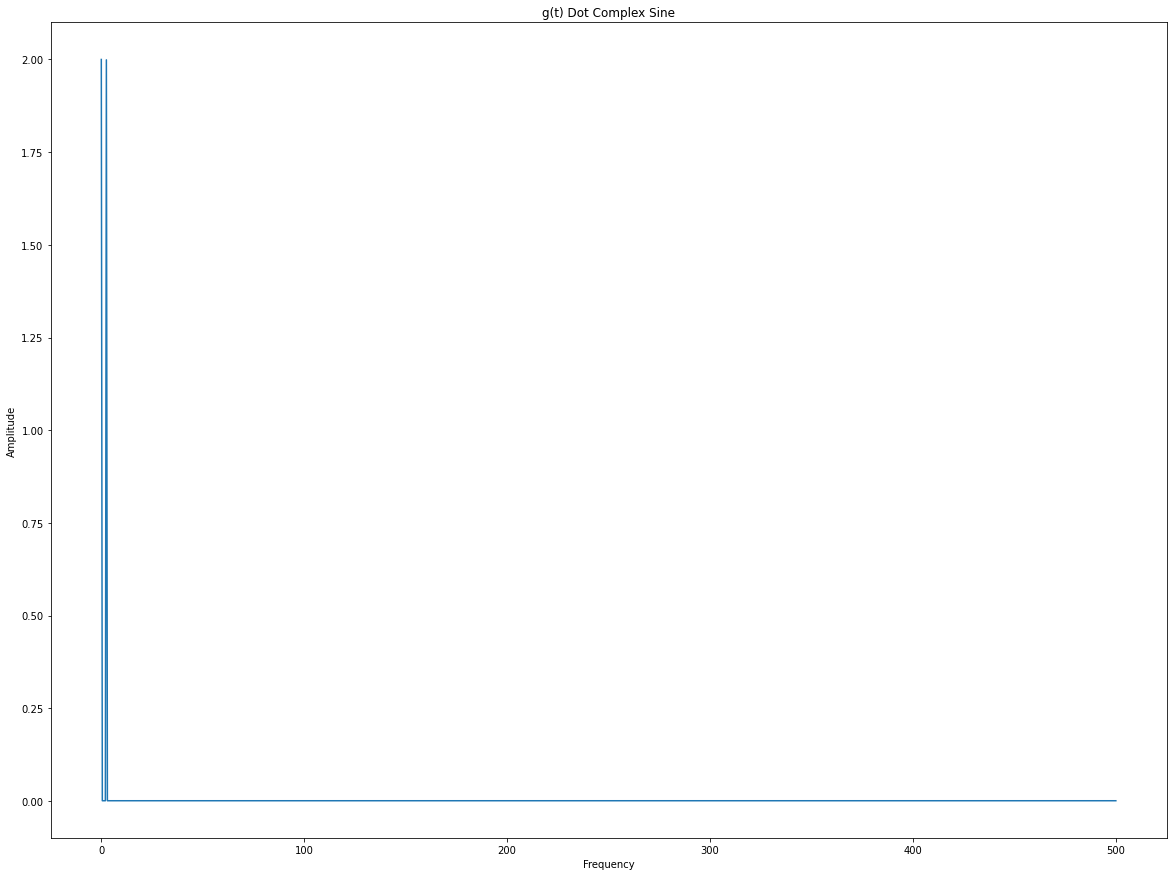

In [22]:
#with dot
g_t = np.sin(np.pi / 2) + 2 * np.sin(2 * np.pi * 5 * normal_t)
ft_g = sum_dot(g_t, normal_freqs, 2)
corr_ft_g = (np.abs(ft_g) / sample_rate)[range(sample_rate)]

fig = plt.figure(figsize=(20,15))
plt.plot(freqs, corr_ft_g)
plt.title("g(t) Dot Complex Sine")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

#with fft
ft_g = np.fft.fft(g_t)
ft_g_corr = (np.abs(ft_g) / (sample_rate))[range(sample_rate)]

fig = plt.figure(figsize=(20,15))
plt.plot(freqs, ft_g_corr)
plt.title("Fourier Transform g(t)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

#with corrocting 

ft_g_new = sum_dot(g_t, normal_freqs, 1)
corr_ft_g_new = (np.abs(ft_g_new) / sample_rate)[range(sample_rate)]

fig = plt.figure(figsize=(20,15))
plt.plot(freqs, corr_ft_g_new)
plt.title("g(t) Dot Complex Sine")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


ج)

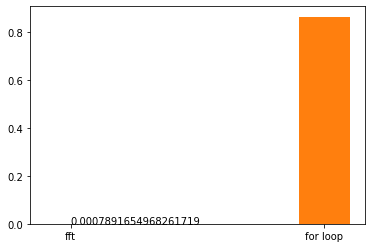

In [6]:
plt.bar(0, fft_time, 0.2)
plt.bar(1, loop_time, 0.2)

plt.xticks(np.arange(2), ['fft', 'for loop'])

plt.text(fft_time, 0, str(fft_time))

plt.show()